In [31]:
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt   
import seaborn as sns  

data = pd.read_json('yelp_first50.json')
data.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
1,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
2,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
3,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
4,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323


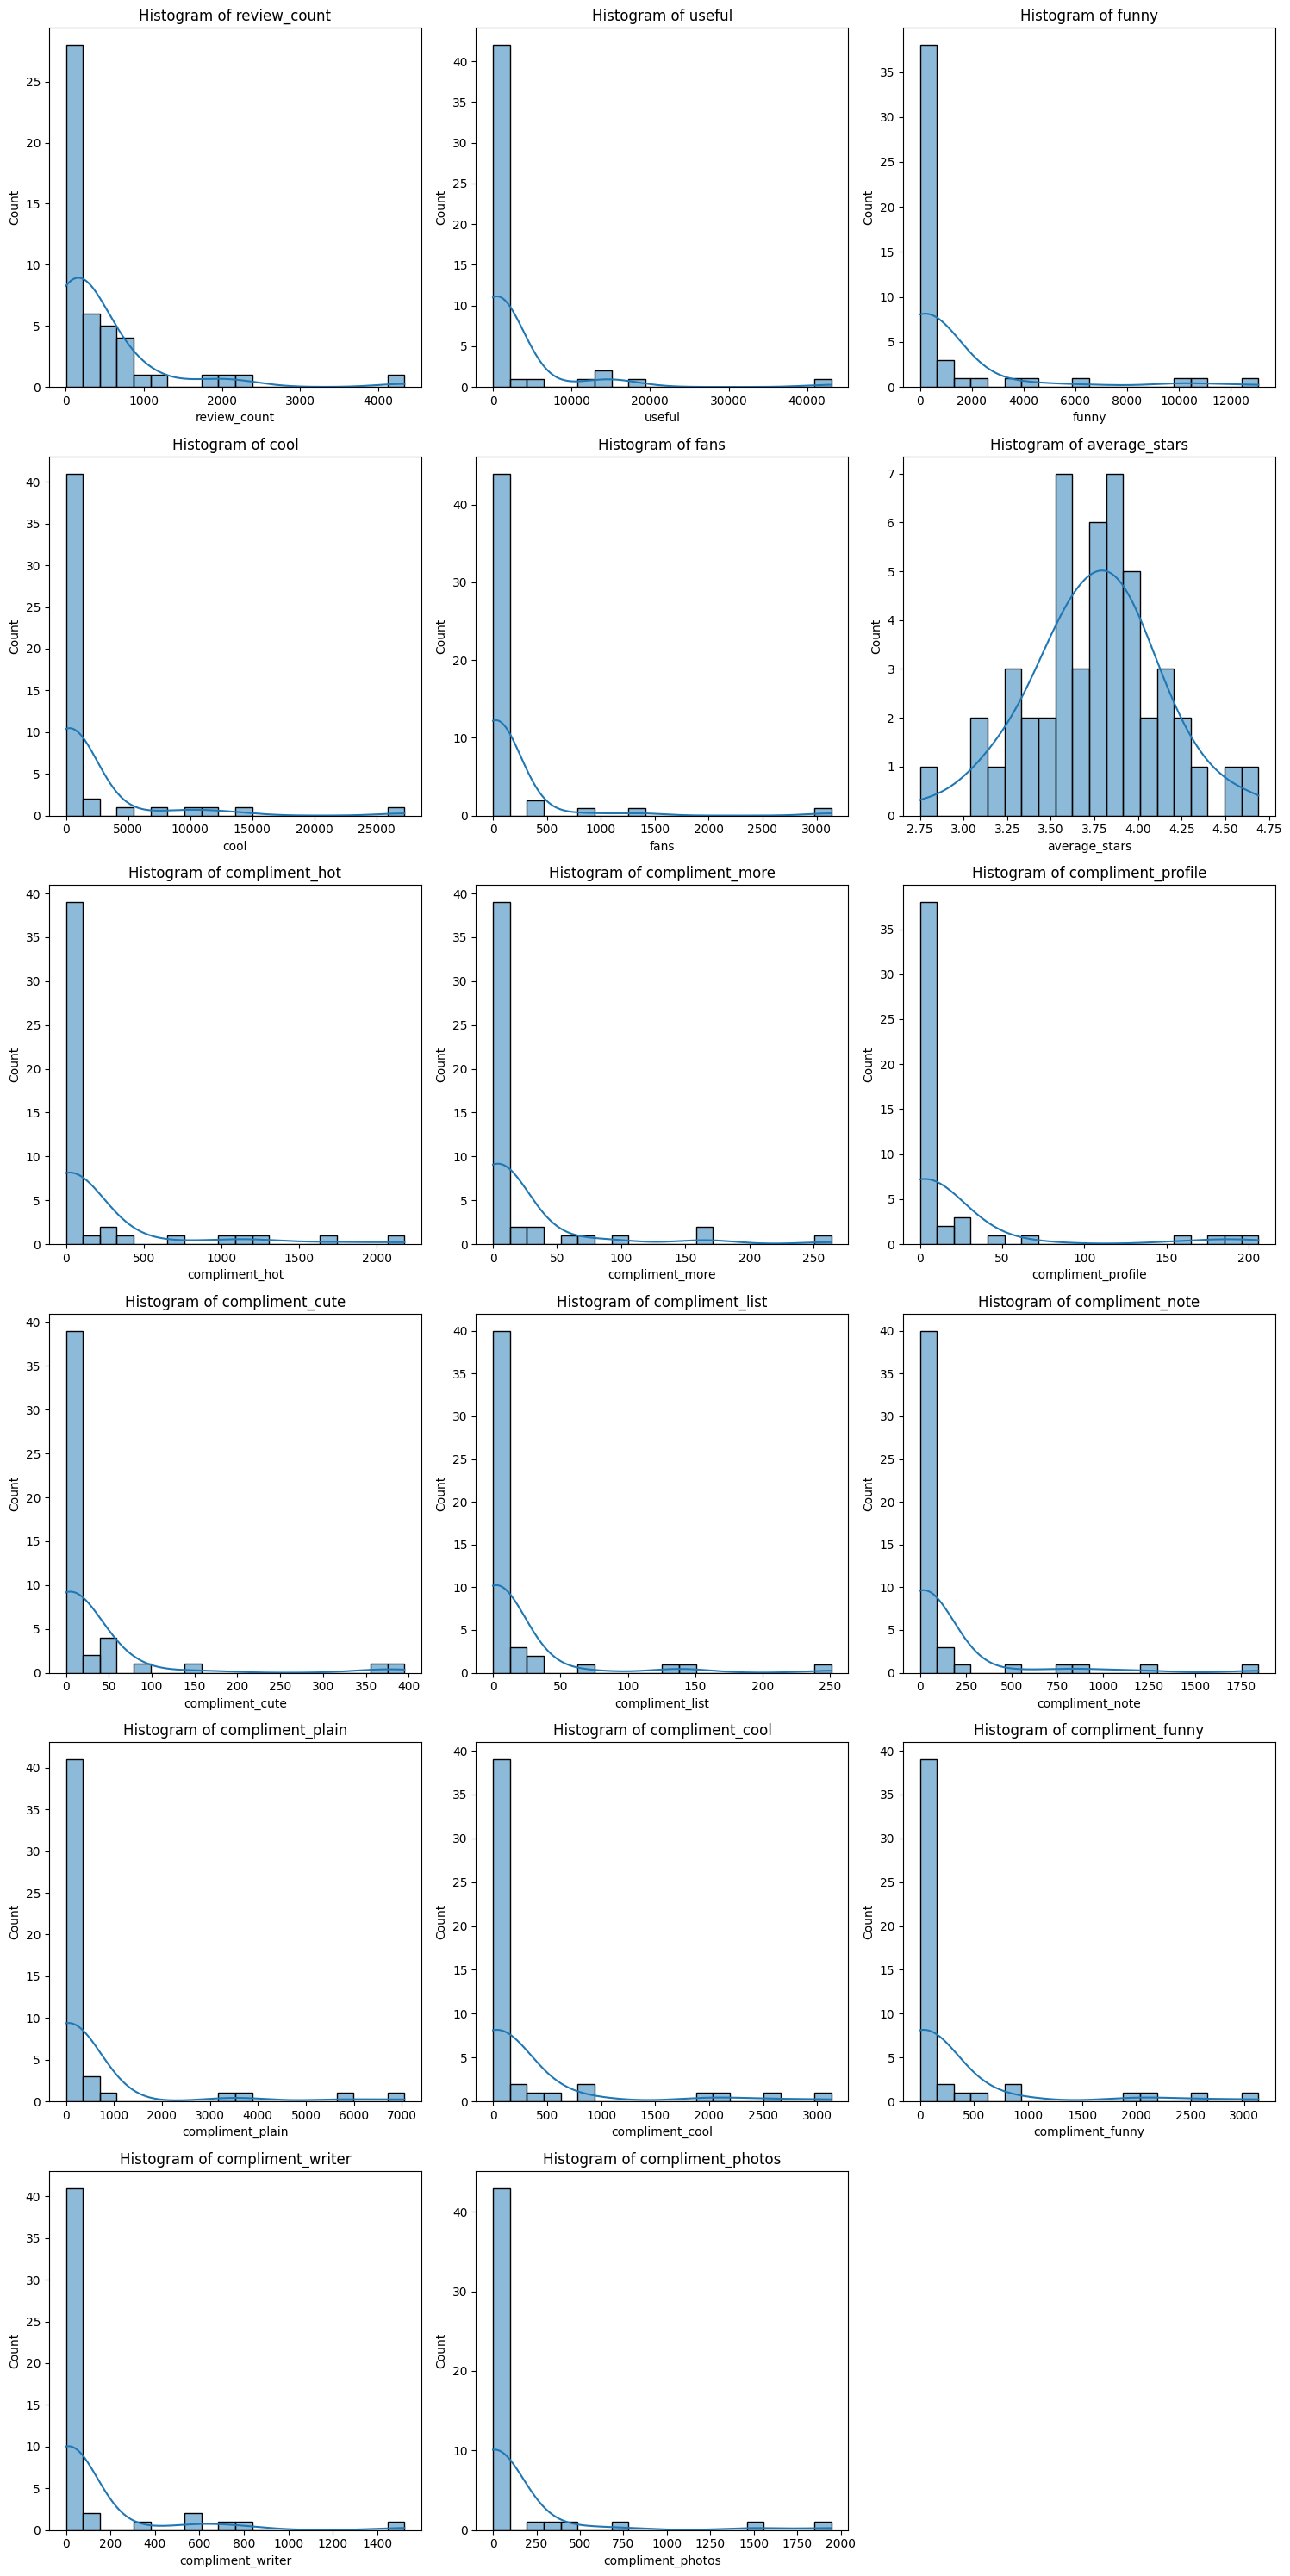

,Variable,Max,Min,Mean,Median,Outliers
0,review_count,4333.00,4.00,445.469388,155.00,"[4333, 1807, 2288, 1982]"
1,useful,43091.00,1.00,2615.224490,222.00,"[43091, 14953, 4573, 17331, 12773, 14004, 3066]"
2,funny,13066.00,0.00,1193.448980,76.00,"[13066, 9940, 3714, 10461, 1260, 4199, 1982, 6..."
3,cool,27281.00,0.00,1768.836735,90.00,"[27281, 11211, 4149, 13734, 7971, 9879, 2235]"
4,fans,3138.00,0.00,141.918367,7.00,"[3138, 1357, 131, 828, 116, 345, 316, 114]"
5,average_stars,4.69,2.75,3.754898,3.79,"[2.75, 4.69]"
6,compliment_hot,2177.00,0.00,197.734694,4.00,"[1145, 1713, 212, 1020, 2177, 319, 693, 256, 1..."
7,compliment_more,264.00,0.00,21.183673,1.00,"[264, 163, 79, 167, 32, 63, 34, 98, 26]"
8,compliment_profile,206.00,0.00,20.346939,0.00,"[184, 191, 17, 68, 206, 27, 46, 29, 156, 24]"
9,compliment_cute,395.00,0.00,27.040816,0.00,"[157, 361, 29, 395, 47, 47, 58, 52, 83]"


In [34]:
def calculate_summary_statistics(df, cols):
    """Calculate summary statistics for the given columns."""
    stats = []
    for col in cols:
        max_val = df[col].max()
        min_val = df[col].min()
        mean_val = df[col].mean()
        median_val = df[col].median()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].values

        stats.append({
            "Variable": col,
            "Max": max_val,
            "Min": min_val,
            "Mean": mean_val,
            "Median": median_val,
            "Outliers": outliers
        })
    return pd.DataFrame(stats)

def plot_histograms(df, cols, rows, cols_per_row):
    """Plot histograms of numerical columns in a grid layout."""
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Separating numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate summary statistics
summary_df = calculate_summary_statistics(data, numerical_cols)

# Plot histograms in a grid layout (3 columns per row)
num_cols_per_row = 3
num_rows = (len(numerical_cols) + num_cols_per_row - 1) // num_cols_per_row
plot_histograms(data, numerical_cols, num_rows, num_cols_per_row)

# Display summary statistics
summary_df


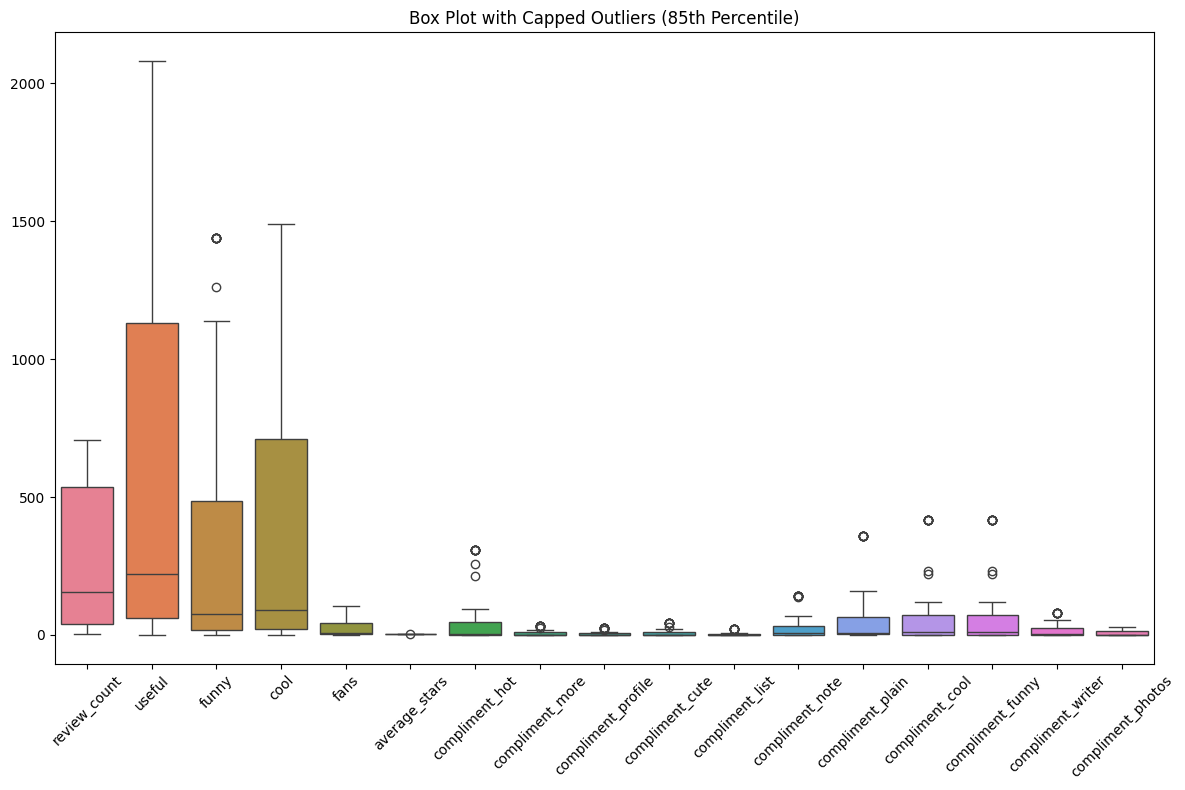

In [43]:
def plot_boxplot(df, cols, title='Box Plot of All Numerical Variables'):
    """Plot a box plot for all numerical columns to compare side by side."""
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df[cols])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Cap extreme values at the 95th percentile for numerical columns
capped_data = cap_extreme_values(data, numerical_cols, quantile=0.85)

# Plot the box plot with capped data
plot_boxplot(capped_data, numerical_cols, title='Box Plot with Capped Outliers (85th Percentile)')



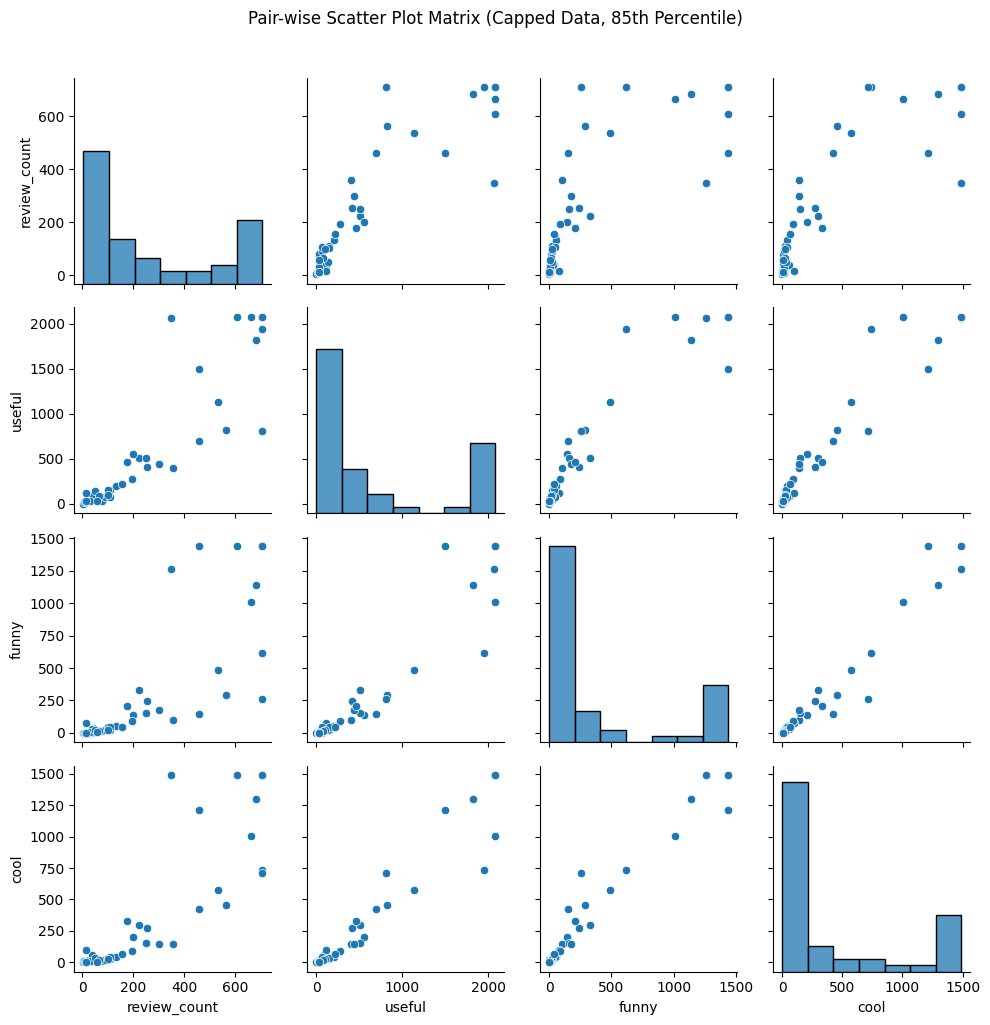

In [47]:
# Cap extreme values at the 85th percentile for better visualization
capped_data_85 = cap_extreme_values(data, numerical_cols, quantile=0.85)

# Select a subset of numerical columns dynamically (e.g., first 4 columns)
selected_cols = numerical_cols[:4]  # Adjusting to 4 for more focused visualization

# Pair-wise scatter plot matrix for the data (85th percentile) and selected columns
sns.pairplot(capped_data_85[selected_cols])
plt.suptitle('Pair-wise Scatter Plot Matrix (Capped Data, 85th Percentile)', y=1.02)
plt.tight_layout()
plt.show()




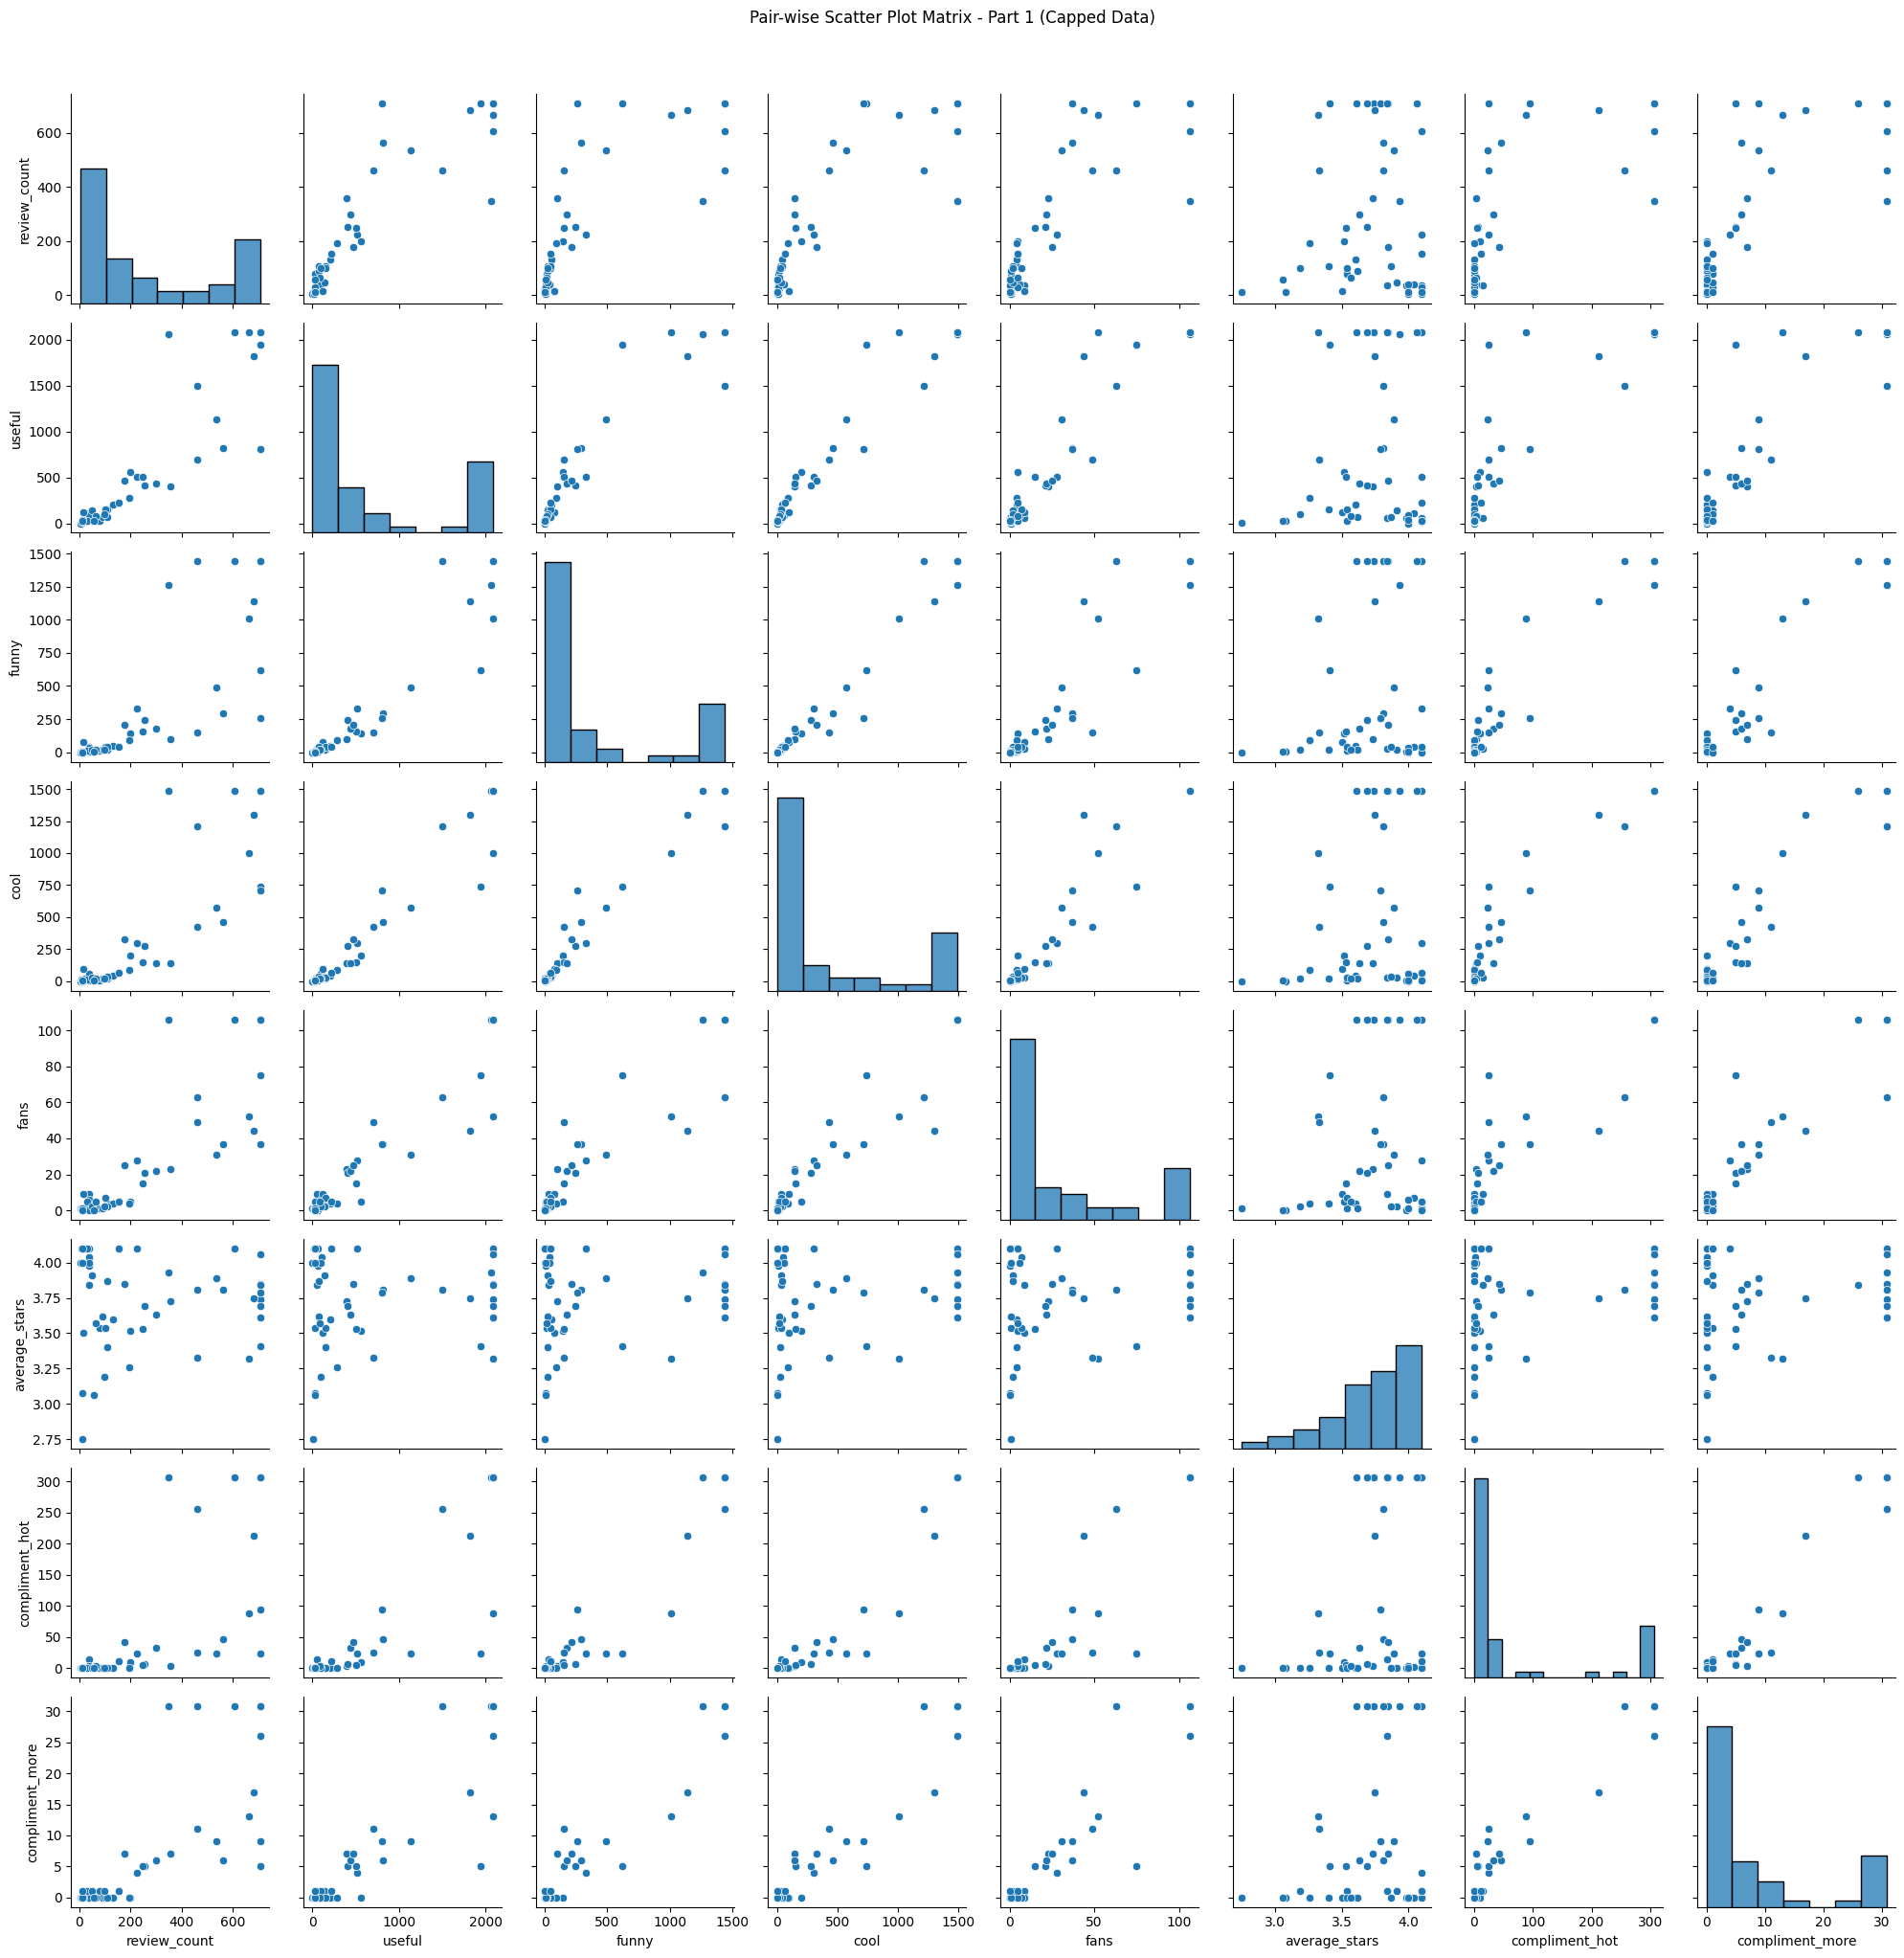

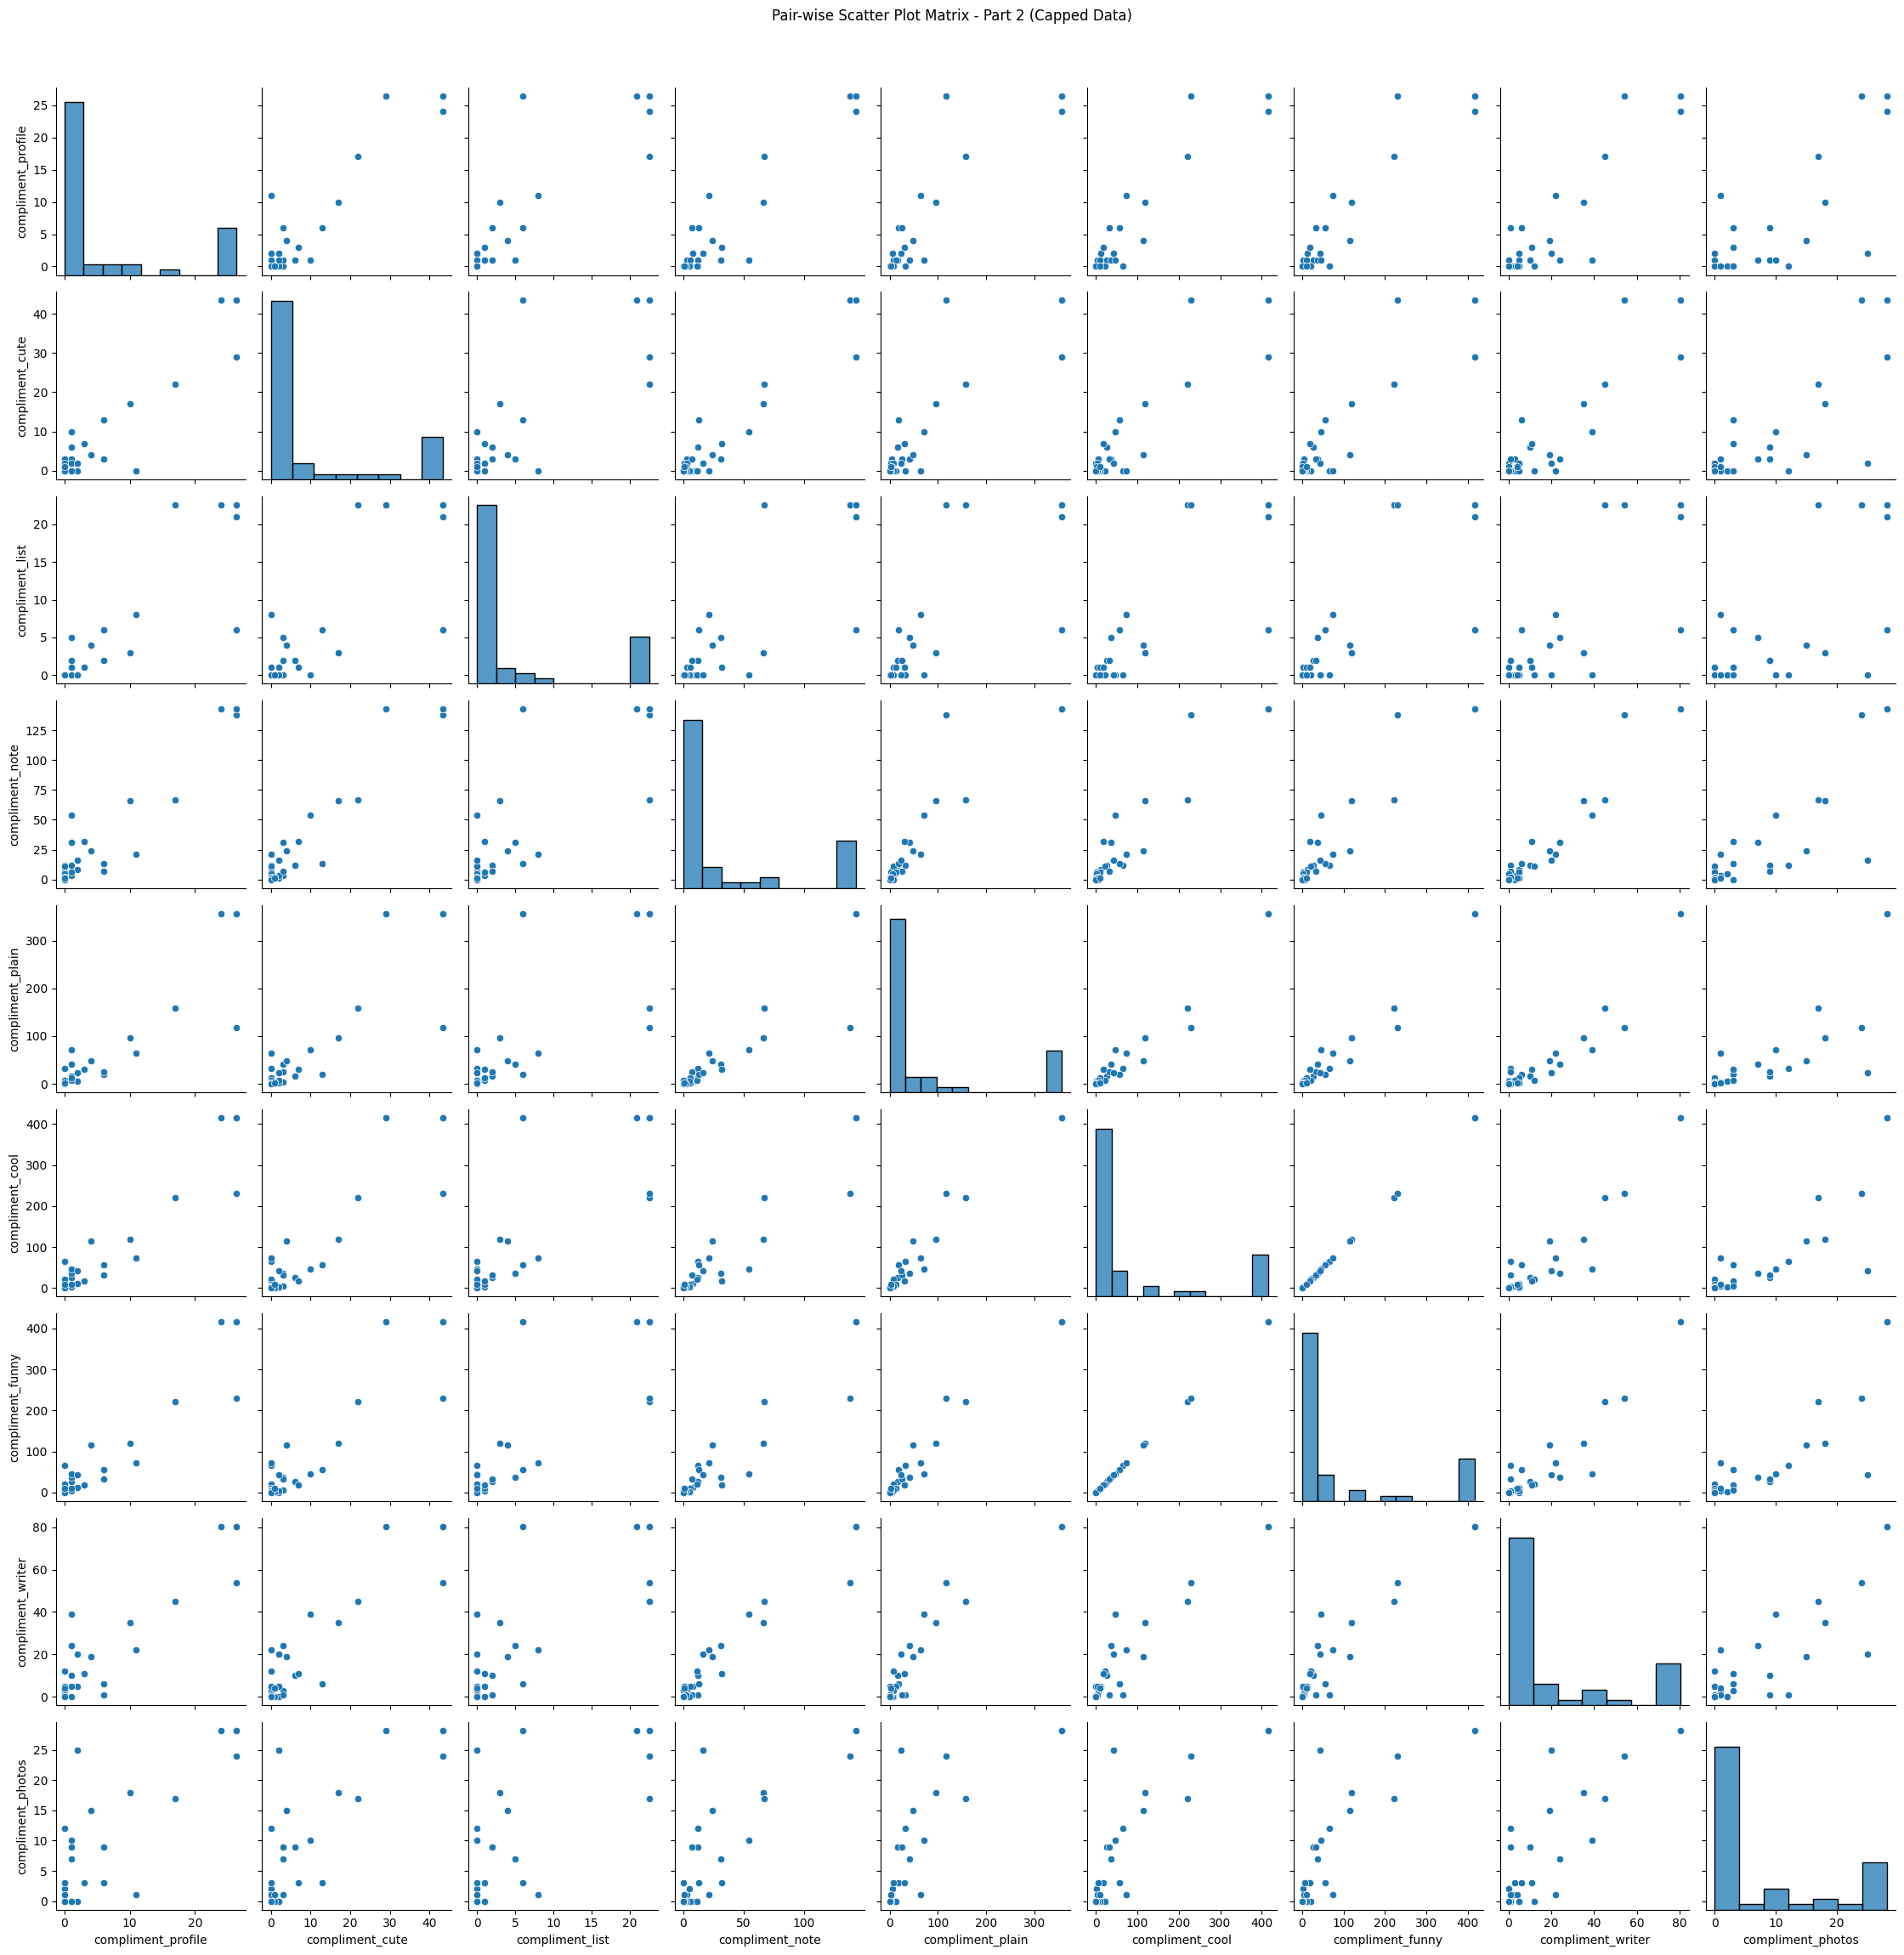

In [46]:
# Splitting numerical columns into two smaller groups using capped data
num_cols_split1 = capped_data[numerical_cols[:len(numerical_cols)//2]]
num_cols_split2 = capped_data[numerical_cols[len(numerical_cols)//2:]]

# Plotting scatter plot matrix for the first group of numerical variables
sns.pairplot(num_cols_split1)
plt.suptitle('Pair-wise Scatter Plot Matrix - Part 1 (Capped Data)', y=1.02)
plt.tight_layout()
plt.show()

# Plotting scatter plot matrix for the second group of numerical variables
sns.pairplot(num_cols_split2)
plt.suptitle('Pair-wise Scatter Plot Matrix - Part 2 (Capped Data)', y=1.02)
plt.tight_layout()
plt.show()


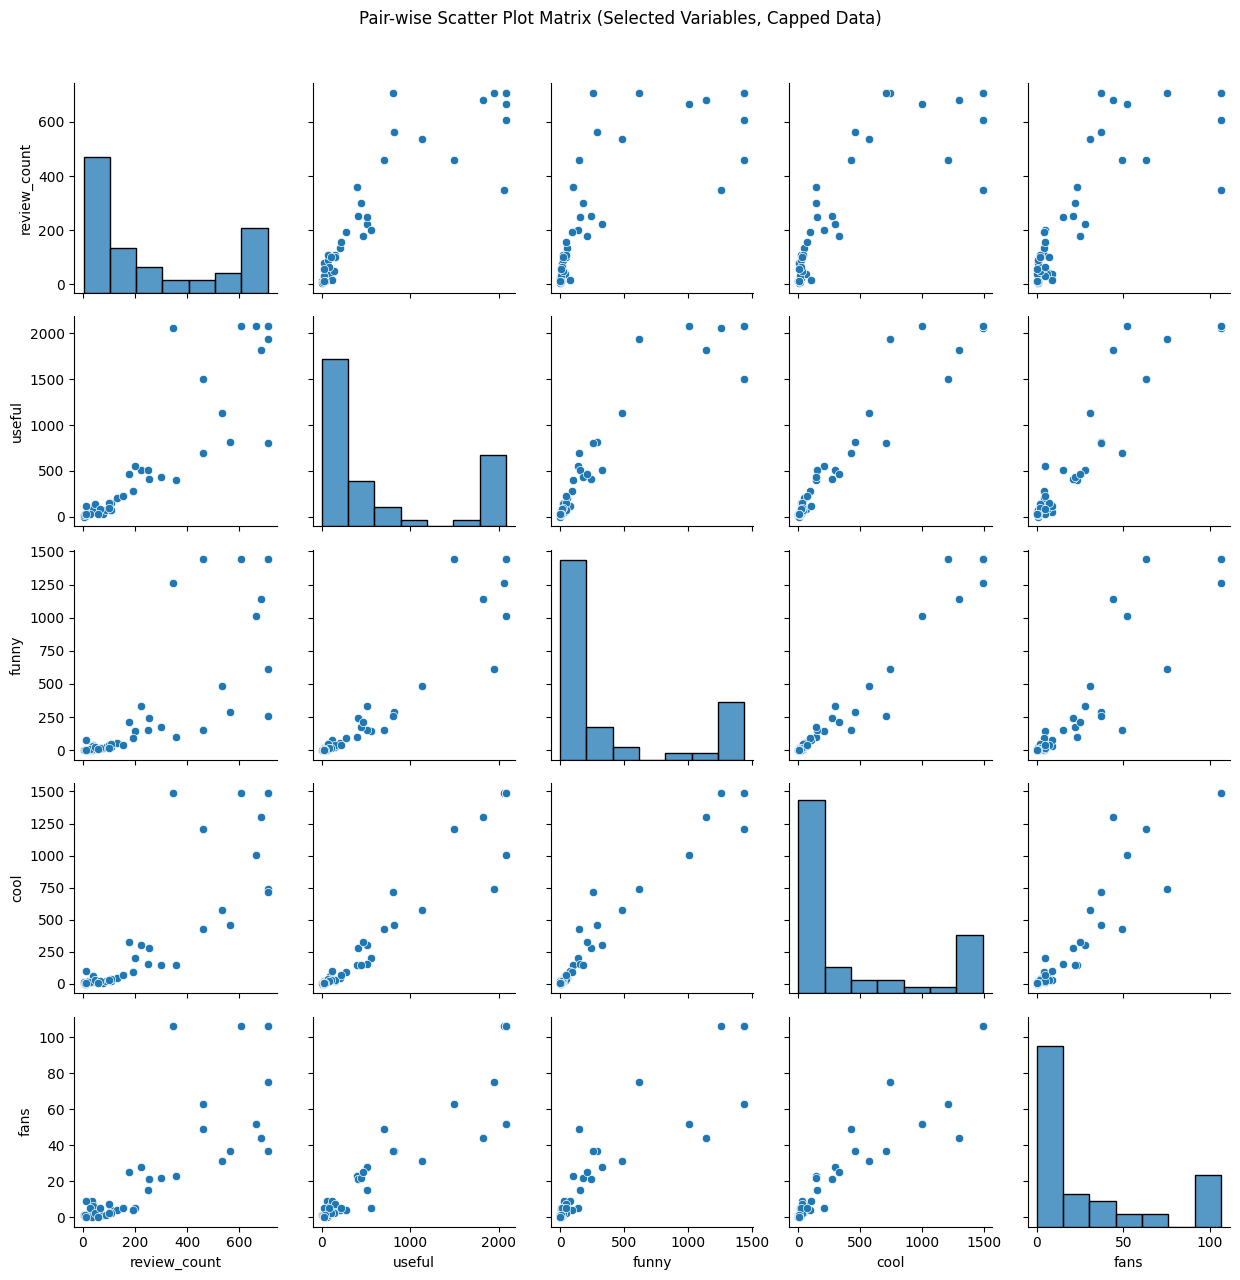

In [48]:
# Dynamically selecting a few representative variables for scatter plots
selected_cols = ['review_count', 'useful', 'funny', 'cool', 'fans']  # Using capped data for the same columns

# Creating pair-wise scatter plots for the selected numerical variables
sns.pairplot(capped_data[selected_cols])
plt.suptitle('Pair-wise Scatter Plot Matrix (Selected Variables, Capped Data)', y=1.02)
plt.tight_layout()
plt.show()

